Table Size: (153, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         153 non-null    object 
 1   Order Date       153 non-null    object 
 2   Ship Date        148 non-null    object 
 3   Delivery Date    151 non-null    object 
 4   Customer Region  153 non-null    object 
 5   Category         153 non-null    object 
 6   Shipping Mode    153 non-null    object 
 7   Returned         150 non-null    object 
 8   Sales            153 non-null    float64
dtypes: float64(1), object(8)
memory usage: 10.9+ KB

Missing values per column:

Order ID           0
Order Date         0
Ship Date          5
Delivery Date      2
Customer Region    0
Category           0
Shipping Mode      0
Returned           3
Sales              0
dtype: int64

Number of duplicate rows: 3
After removal of duplicates: (150, 9)
<class 'pandas.cor

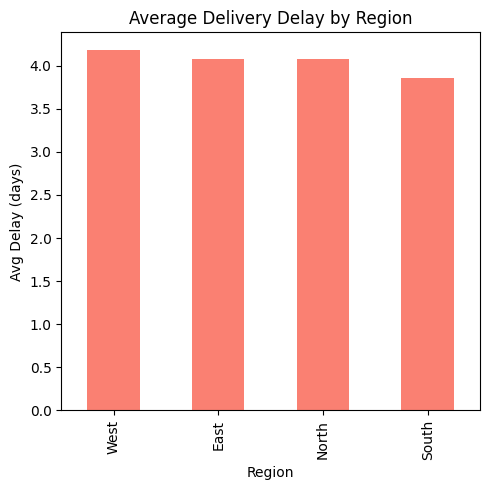

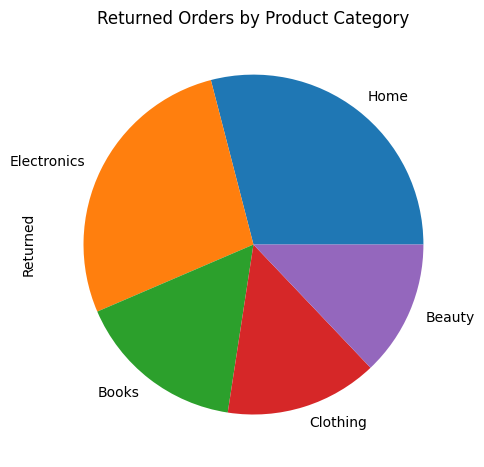

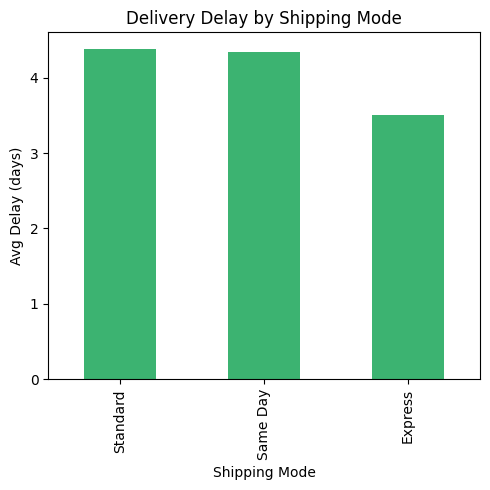

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/orders_dataset.csv')

# Display shape
print("Table Size:", df.shape)

# Preview the desired 'n' no. of rows
df.head(200)

# Check basic data info
df.info()

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Drop duplicates
df = df.drop_duplicates()

# Confirm removal
print("After removal of duplicates:", df.shape)

# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], errors='coerce')

# Confirm changes
df[['Order Date', 'Ship Date', 'Delivery Date']].dtypes

df.info()

df.isnull().sum()

# See which rows have any missing value
df[df.isnull().any(axis=1)]

# Drop rows with missing Order, Ship, or Delivery dates
df = df.dropna(subset=['Order Date', 'Ship Date', 'Delivery Date'])

# Fill missing 'Returned' values with 'No' (assuming most weren't returned)
df['Returned'] = df['Returned'].fillna('No')

df.isnull().sum()

# Create a new column showing delivery delay in days
df['Delivery_Delay'] = (df['Delivery Date'] - df['Ship Date']).dt.days
# How long it took to ship after order was placed
df['Order_to_Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

df[['Order Date', 'Ship Date', 'Delivery Date', 'Order_to_Ship', 'Delivery_Delay']].head(150)

# Average delivery delay per region
region_delays = df.groupby('Customer Region')['Delivery_Delay'].mean().sort_values(ascending=False)
print(region_delays)

# Return count per category
return_rates = df[df['Returned'] == 'Yes'].groupby('Category')['Returned'].count().sort_values(ascending=False)
print(return_rates)

# Delay by shipping mode
mode_delay = df.groupby('Shipping Mode')['Delivery_Delay'].mean().sort_values(ascending=False)
print(mode_delay)

# Bar chart for region vs delay
region_delays.plot(kind='bar', color='salmon', figsize=(5,5))
plt.title('Average Delivery Delay by Region')
plt.xlabel('Region')
plt.ylabel('Avg Delay (days)')
plt.grid(False)
plt.tight_layout()
plt.show()

return_rates.plot(kind='pie', color='lightblue', figsize=(5,5))
plt.title('Returned Orders by Product Category')
plt.grid(False)
plt.tight_layout()
plt.show()

mode_delay.plot(kind='bar', color='mediumseagreen', figsize=(5,5))
plt.title('Delivery Delay by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Avg Delay (days)')
plt.grid(False)
plt.tight_layout()
plt.show()

# Save the cleaned dataset
df.to_csv('data/cleaned_orders_data.csv', index=False)
